In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv("/home/cslogin/mscca61/dataset/housearea.csv")
df

,area,bedroom,windows,price
0,2600,3,4,550000
1,3000,4,3,565000
2,3200,2,5,610000
3,3600,3,6,595000
4,4000,5,7,760000


In [2]:
df.price

0    550000
1    565000
2    610000
3    595000
4    760000
Name: price, dtype: int64

In [3]:
df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

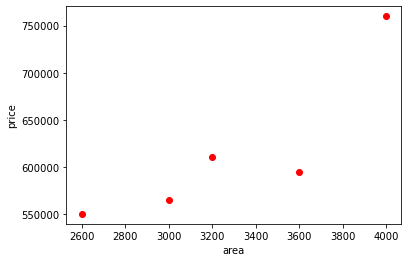

In [4]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area, df.price, color='red')

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [6]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([618681.50684932])

In [7]:
reg.coef_

array([134.07534247])

In [8]:
reg.intercept_

176232.87671232875

In [9]:
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

In [10]:
pr = reg.predict(df[['area']])
df['pprice']=pr
df

,area,bedroom,windows,price,pprice
0,2600,3,4,550000,524828.767123
1,3000,4,3,565000,578458.904110
2,3200,2,5,610000,605273.972603
3,3600,3,6,595000,658904.109589
4,4000,5,7,760000,712534.246575


In [11]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['price'],df['pprice'])
print(mse)

1434760273.9726043


In [12]:
MSE = np.square(np.subtract(df['price'],df['pprice'])).mean()
print(MSE)

1434760273.9726043


In [13]:
new_df = pd.read_csv("/home/cslogin/mscca61/dataset/house.csv")
new_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [14]:
reg.predict(new_df[['area']])

array([524828.76712329, 578458.90410959, 605273.97260274, 658904.10958904,
       712534.24657534])

In [15]:
reg.predict(new_df[['area']])

new_df['price']=p
new_df

NameError: name 'p' is not defined

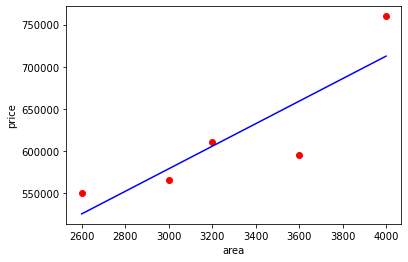

In [16]:
new_df.to_csv("/home/cslogin/mscca61/dataset/predict.csv", index=False)

plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color='red')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [17]:
from sklearn.metrics import mean_squared_error

Y_true = [1,1,2,2,4]

Y_pred = [0.6,1.29,1.99,2.69,3.4]

mse=mean_squared_error(Y_true, Y_pred)
print(mse)

0.21606


In [18]:
import math

rmse=math.sqrt(mse)
print(rmse)

0.4648225467853297


In [19]:
n=5
sum=0
for i in range(n):
    sum=sum+abs(Y_true[i]-Y_pred[i])
    
error=sum/n
print("Mean Absolute error: "+ str(error))

Mean Absolute error: 0.398


In [20]:
df

,area,bedroom,windows,price,pprice
0,2600,3,4,550000,524828.767123
1,3000,4,3,565000,578458.904110
2,3200,2,5,610000,605273.972603
3,3600,3,6,595000,658904.109589
4,4000,5,7,760000,712534.246575


In [21]:
mse=mean_squared_error(df.price,df.pprice)
print(mse)

1434760273.9726043


In [22]:
print(math.sqrt(mse))

37878.22955171749


In [23]:
arrp = df[['price']].to_numpy()
arrpp=df[['pprice']].to_numpy()
arrp
arrpp

array([[524828.76712329],
       [578458.90410959],
       [605273.97260274],
       [658904.10958904],
       [712534.24657534]])

In [26]:
n=5
sum=5
for i in range(5):
    sum=sum+abs(arrp[i]-arrpp[i])
    
error=sum/n
print("Mean Absolute error: "+ str(error))

Mean Absolute error: [30946.20547945]


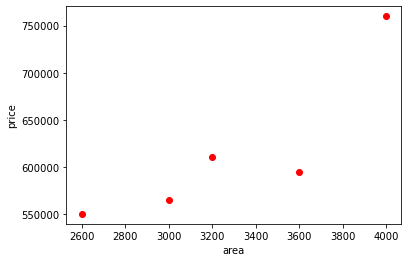

In [27]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color='red')

In [28]:
from sklearn.preprocessing import PolynomialFeatures

polynorm = PolynomialFeatures(degree=2)
x_polynorm = polynorm.fit_transform(df[['area']])
x_polynorm

array([[1.000e+00, 2.600e+03, 6.760e+06],
       [1.000e+00, 3.000e+03, 9.000e+06],
       [1.000e+00, 3.200e+03, 1.024e+07],
       [1.000e+00, 3.600e+03, 1.296e+07],
       [1.000e+00, 4.000e+03, 1.600e+07]])

In [29]:
poly_reg=linear_model.LinearRegression()
poly_reg.fit(x_polynorm,df.price)

LinearRegression()

In [30]:
Y_predprice = poly_reg.predict(x_polynorm)
Y_predprice

array([559536.58055641, 560574.83731016, 576574.64011031, 639535.59455713,
       743778.34746599])

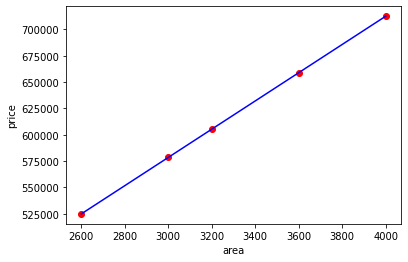

In [59]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color='red')
plt.plot(df.area,ploy_reg.predict(x_polynorm),color='blue')

In [31]:
mse=mean_squared_error(df.price,Y_predprice)
print(mse)

694868862.1573651
